This code generates an example of Wald's sequential probability ratio test (SPRT).

In [1]:
# set up imports
import numpy
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline


In [2]:
alpha=0.05 # likelihood of deciding A when A is true
beta=1.-alpha # likelihood of deciding B when B is true

A=numpy.log(beta/alpha)
B=numpy.log((1.-beta)/(1.-alpha))


In [3]:
# get the log likelihood ratio for the data under either positive or negative motion


def gauss_LLR(xbar, sigma=1, mu=[10,-10]):
    """
    Gaussian log likelihood ratio ratio
    """ 
    return numpy.log(scipy.stats.norm.pdf(xbar,loc=mu[0],scale=sigma)/scipy.stats.norm.pdf(xbar,loc=mu[1],scale=sigma))
    



In [40]:
# generate some data from a noisy diffusion process

def mkdata(drift=0.001,noise_sd=0.01,npts=1000):
    data=numpy.zeros(npts)
    cumul=numpy.zeros(npts)
    for i in range(1,npts):
        data[i]=drift+numpy.random.randn()*noise_sd
        cumul[i]=numpy.sum(data[:(i+1)])
    return data,cumul


In [41]:
# create simulated data, fit SPRT and return # of time steps

def fit_sprt(data):
    npts=data.shape[0]
    ll=[0]
    S=[0]
    #cumulative sum of log-likelihood ratio
    for i in range(1,npts):
        ll.append(gauss_LLR(data[i]))
        S=numpy.sum(ll)
        if S>A:
            #print('upward decision: %d steps (S=%f)'%(i,S))
            return([1,i])
        elif S<B:
            #print('downward decision: %d steps (S=%f)'%(i,S))
            return([-1,i])
    return([numpy.nan,i])

    
nruns=100
npts=1000
outcome=[]
cumul=numpy.zeros((nruns,npts))
for r in range(nruns):
    data,c=mkdata(npts=npts)
    sprt=fit_sprt(data)
    outcome.append(sprt)
    cumul[r,:sprt[1]]=c[:sprt[1]]
    
outcome=numpy.array(outcome)
print('accuracy=%0.3f'%numpy.mean(outcome[:,0]==1))
print('proportion not converged=%f'%numpy.mean(numpy.isnan(outcome[:,0])))

accuracy=0.960
proportion not converged=0.000000


(array([ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  27. ,   42.9,   58.8,   74.7,   90.6,  106.5,  122.4,  138.3,
         154.2,  170.1,  186. ,  201.9,  217.8,  233.7,  249.6,  265.5,
         281.4,  297.3,  313.2,  329.1,  345. ,  360.9,  376.8,  392.7,
         408.6,  424.5,  440.4,  456.3,  472.2,  488.1,  504. ,  519.9,
         535.8,  551.7,  567.6,  583.5,  599.4,  615.3,  631.2,  647.1,
         663. ,  678.9,  694.8,  710.7,  726.6,  742.5,  758.4,  774.3,
         790.2,  806.1,  822. ]),
 <a list of 50 Patch objects>)

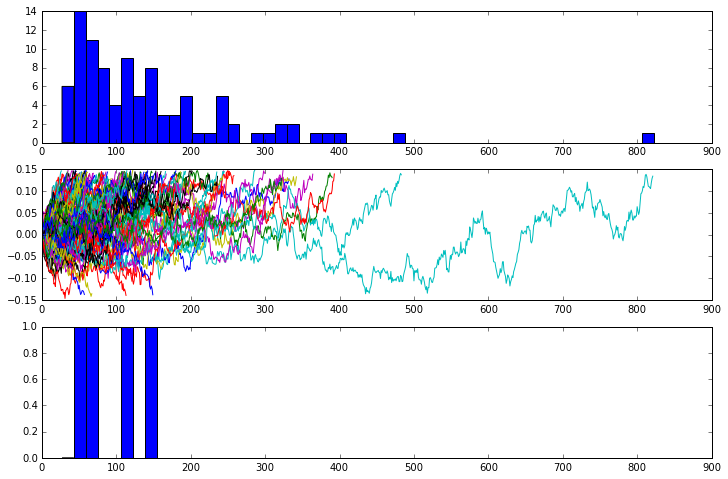

In [51]:
correct=outcome[:,0]==1
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
h=plt.hist(outcome[correct,1],50)
plt.subplot(3,1,2)
for i in range(cumul.shape[0]):
    plt.plot(cumul[i,:outcome[i,1]])
plt.subplot(3,1,3)

    
plt.hist(outcome[~correct,1],bins=h[1])

